# TRANSLATION WITH A SEQUENCE TO SEQUENCE NETWORK AND ATTENTION

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [61]:
import random
import matplotlib.pyplot as plt
from pathlib import Path
from src import config
from src.make_dataset import prepareData
from src.models import EncoderRNN, AttnDecoderRNN
from src.train_model import trainIters, test
from src.evaluate import evaluateRandomly, evaluate, evaluateAndShowAttention

In [48]:
input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 10599 sentence pairs
Counting words...
Counted words:
fra 4345
eng 2803
['j en suis mecontent .', 'i m not happy with this .']


7m 28s (- 104m 43s) (5000 6%) 2.8489
16m 44s (- 108m 52s) (10000 13%) 2.2832
22m 34s (- 90m 16s) (15000 20%) 1.9837
28m 7s (- 77m 20s) (20000 26%) 1.7194
35m 22s (- 70m 45s) (25000 33%) 1.5469
38m 45s (- 58m 8s) (30000 40%) 1.3709
41m 58s (- 47m 58s) (35000 46%) 1.2308
45m 10s (- 39m 31s) (40000 53%) 1.1337
48m 14s (- 32m 9s) (45000 60%) 1.0146
51m 2s (- 25m 31s) (50000 66%) 0.9187
54m 25s (- 19m 47s) (55000 73%) 0.8299
57m 39s (- 14m 24s) (60000 80%) 0.7722
60m 49s (- 9m 21s) (65000 86%) 0.6901
65m 13s (- 4m 39s) (70000 93%) 0.6305
69m 55s (- 0m 0s) (75000 100%) 0.5656


<Figure size 432x288 with 0 Axes>

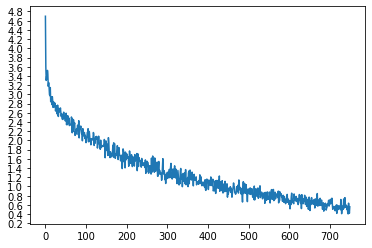

In [57]:
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, input_lang, output_lang, pairs, 75000, print_every=5000)

In [58]:
evaluateRandomly(encoder1, attn_decoder1, input_lang, output_lang, pairs)

> tu es fabuleux .
= you are fabulous .
< you re fascinating . <EOS>

> tu reagis de maniere excessive .
= you re overreacting .
< you re overreacting . <EOS>

> je vais en europe la semaine prochaine .
= i am going to europe next week .
< i am going to study next next week . <EOS>

> tu es sauve .
= you re safe .
< you re safe . <EOS>

> nous sommes a court d argent .
= we are short of money .
< we re out of money . <EOS>

> il a vraiment une tenue negligee .
= he s very sloppy in his dress .
< he s a a a a . . <EOS>

> tu es fort raffine .
= you re very sophisticated .
< you re very sophisticated . <EOS>

> t es marrante .
= you re fun .
< you re funny . <EOS>

> tu es fatigue non ?
= you are tired aren t you ?
< you re tired of them aren t you ? <EOS>

> je vais appeler la police .
= i m going to go call the police .
< i m going to go the police the police .



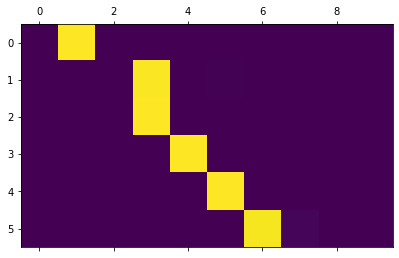

In [59]:
output_words, attentions = evaluate(
    encoder1, attn_decoder1, "j ai trop froid .", input_lang, output_lang)
plt.matshow(attentions.numpy())

input = elle a cinq ans de moins que moi .
output = she s five years younger than me . <EOS>
input = elle est trop petite .
output = she s too short . <EOS>
input = je ne crains pas de mourir .
output = i m not scared to die . <EOS>
input = c est un jeune directeur plein de talent .
output = he s a talented young . . <EOS>


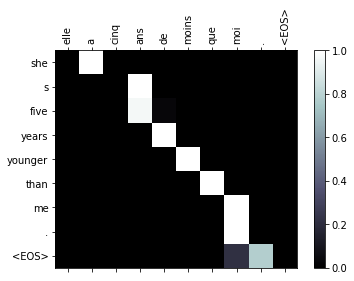

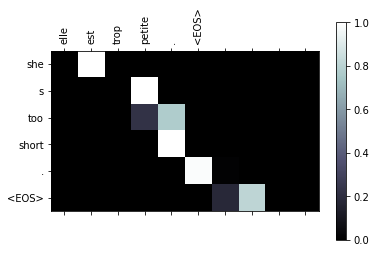

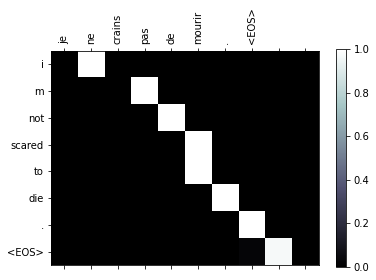

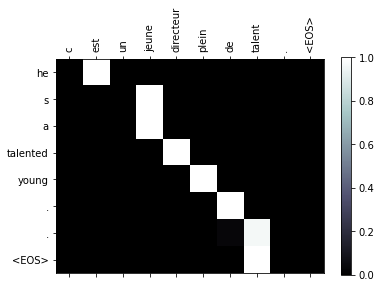

In [60]:
evaluateAndShowAttention("elle a cinq ans de moins que moi .", input_lang, output_lang, encoder1, attn_decoder1)

evaluateAndShowAttention("elle est trop petite .", input_lang, output_lang, encoder1, attn_decoder1)

evaluateAndShowAttention("je ne crains pas de mourir .", input_lang, output_lang, encoder1, attn_decoder1)

evaluateAndShowAttention("c est un jeune directeur plein de talent .", input_lang, output_lang, encoder1, attn_decoder1)

In [62]:
torch.save(encoder1.state_dict(), Path("./models/nlp/seq2seq_encoder"))
torch.save(attn_decoder1.state_dict(), Path("./models/nlp/seq2seq_decoder"))